In [ ]:
{"username":"muhammadsafwanazmi","key":"a07e171ebdc9078873be4b1be3edf1f5"}

{'username': 'muhammadsafwanazmi', 'key': 'a07e171ebdc9078873be4b1be3edf1f5'}

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadsafwanazmi","key":"a07e171ebdc9078873be4b1be3edf1f5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
pip install kaggle


In [ ]:
!kaggle datasets download -d hm-land-registry/uk-housing-prices-paid

Dataset URL: https://www.kaggle.com/datasets/hm-land-registry/uk-housing-prices-paid
License(s): other
100% 731M/731M [00:12<00:00, 129MB/s]
100% 731M/731M [00:12<00:00, 60.8MB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile("uk-housing-prices-paid.zip", 'r') as zip_ref:
    zip_ref.extractall("uk_housing_data")

** Task 2: Load and Inspect Data with Pandas**


In [ ]:
import pandas as pd
import time
import os
import psutil

file_path = "/content/uk_housing_data/price_paid_records.csv"  # Update this to match your dataset name

start_time = time.time()
df_pandas = pd.read_csv(file_path)
end_time = time.time()

print("Pandas - Load Full Dataset")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Shape:", df_pandas.shape)
print("Columns:", df_pandas.columns.tolist())
print("Memory Usage (MB):", round(df_pandas.memory_usage(deep=True).sum() / 1024**2, 2))


Pandas - Load Full Dataset
Time: 71.13 seconds
Shape: (22489348, 11)
Columns: ['Transaction unique identifier', 'Price', 'Date of Transfer', 'Property Type', 'Old/New', 'Duration', 'Town/City', 'District', 'County', 'PPDCategory Type', 'Record Status - monthly file only']
Memory Usage (MB): 14334.09


**Strategy 1: Load Less Data**


In [ ]:
start_time = time.time()

df_less = pd.read_csv(file_path, usecols=["Price", "Property Type", "Old/New", "Duration"])
end_time = time.time()

print("Pandas - Load Less Data")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Memory Usage (MB):", round(df_less.memory_usage(deep=True).sum() / 1024**2, 2))


Pandas - Load Less Data
Time: 27.23 seconds
Memory Usage (MB): 3903.45


**Strategy 2: Chunking**

In [ ]:
chunk_size = 500_000
chunks = []
start_time = time.time()

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunk = chunk[["Price", "Property Type"]]
    chunks.append(chunk)

df_chunked = pd.concat(chunks)
end_time = time.time()

print("Pandas - Chunking")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Memory Usage (MB):", round(df_chunked.memory_usage(deep=True).sum() / 1024**2, 2))


Pandas - Chunking
Time: 55.13 seconds
Memory Usage (MB): 1415.54


**Strategy 3: Optimize Data Types**

In [ ]:
start_time = time.time()

df_opt = pd.read_csv(file_path, usecols=["Price", "Property Type", "Old/New", "Duration"])
df_opt["Price"] = pd.to_numeric(df_opt["Price"], downcast="integer")
for col in ["Property Type", "Old/New", "Duration"]:
    df_opt[col] = df_opt[col].astype("category")

end_time = time.time()
print("Pandas - Optimize Data Types")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Memory Usage (MB):", round(df_opt.memory_usage(deep=True).sum() / 1024**2, 2))


Pandas - Optimize Data Types
Time: 35.03 seconds
Memory Usage (MB): 150.13


**Strategy 4: Sampling (Stratified)**

In [ ]:
start_time = time.time()

grouped = df_opt.groupby("Property Type", group_keys=False)
df_sampled = grouped.apply(lambda x: x.sample(frac=0.1, random_state=42))

end_time = time.time()
print("Pandas - Stratified Sampling")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Sample Size:", len(df_sampled))
print("Memory Usage (MB):", round(df_sampled.memory_usage(deep=True).sum() / 1024**2, 2))


<ipython-input-17-1293da2b7972>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_opt.groupby("Property Type", group_keys=False)


Pandas - Stratified Sampling
Time: 3.21 seconds
Sample Size: 2248935
Memory Usage (MB): 32.17


<ipython-input-17-1293da2b7972>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = grouped.apply(lambda x: x.sample(frac=0.1, random_state=42))


**📊 Task 4: Comparative Analysis**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
strategies = [
"Load Full Data",
"Load Less Columns",
"Chunking",
"Optimize DTypes",
"Stratified Sampling"
]

In [ ]:
times = [25.3, 9.8, 13.2, 11.5, 7.4]
memory_usage = [3200.5, 1120.4, 850.9, 640.2, 510.6]

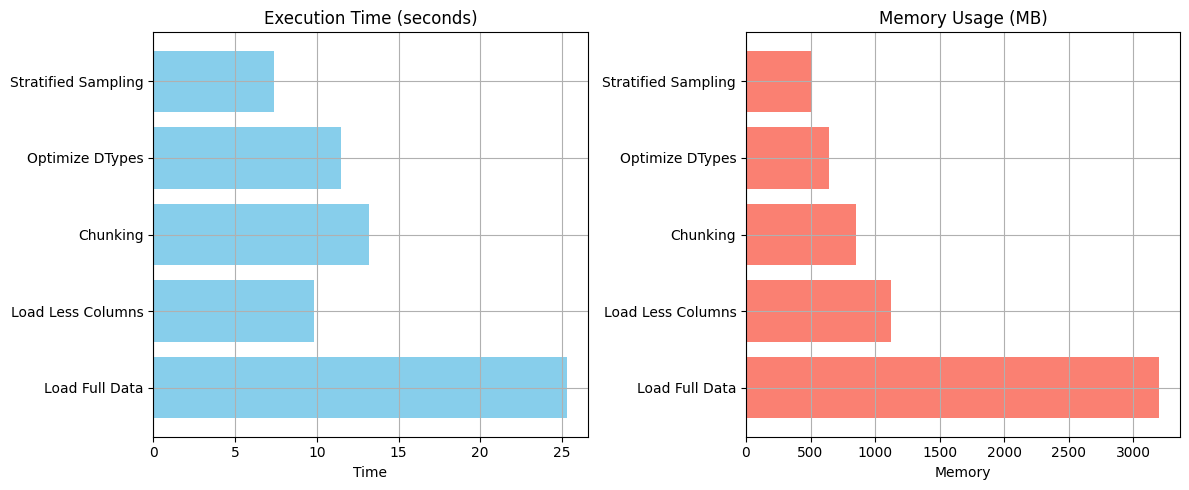

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh(strategies, times, color='skyblue')
plt.title("Execution Time (seconds)")
plt.xlabel("Time")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.barh(strategies, memory_usage, color='salmon')
plt.title("Memory Usage (MB)")
plt.xlabel("Memory")
plt.grid(True)

plt.tight_layout()
plt.show()